Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Load Dataset

Dataset Link = https://www.kaggle.com/code/alpertemel/fer2013-with-keras/input

In [2]:
data = pd.read_csv("fer2013.csv")

Extract features

In [3]:
# Extract features and labels

X = data['pixels'].apply(lambda x: np.array([int(pixel) for pixel in x.split()])).values
y = data['emotion'].values

# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Flatten the images for SVM

X_train_flat = np.array([image.flatten() for image in X_train])
X_test_flat = np.array([image.flatten() for image in X_test])

Before the PreProcessing

Model Training and Evaluation - SVM

In [13]:
# Train

svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train_flat, y_train)

# Evaluate SVM
svm_predictions = svm_model.predict(X_test_flat)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))

SVM Accuracy: 0.34536082474226804
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.24      0.24       985
           1       0.25      0.22      0.23       102
           2       0.26      0.22      0.24      1043
           3       0.44      0.56      0.49      1765
           4       0.27      0.26      0.27      1210
           5       0.48      0.42      0.45       795
           6       0.33      0.27      0.29      1278

    accuracy                           0.35      7178
   macro avg       0.32      0.31      0.32      7178
weighted avg       0.34      0.35      0.34      7178



Model Training and Evaluation - Naïve Bayes

In [14]:
# Train Naïve Bayes Model

nb_model = GaussianNB()
nb_model.fit(X_train_flat, y_train)

# Evaluate Naïve Bayes

nb_predictions = nb_model.predict(X_test_flat)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naïve Bayes Accuracy:", nb_accuracy)
print("Naïve Bayes Classification Report:\n", classification_report(y_test, nb_predictions))

Naïve Bayes Accuracy: 0.2148230704931736
Naïve Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.05      0.08       985
           1       0.02      0.17      0.03       102
           2       0.21      0.05      0.09      1043
           3       0.42      0.14      0.21      1765
           4       0.25      0.40      0.31      1210
           5       0.20      0.60      0.30       795
           6       0.28      0.16      0.21      1278

    accuracy                           0.21      7178
   macro avg       0.22      0.23      0.17      7178
weighted avg       0.27      0.21      0.20      7178



Data Preprocessing 

In [4]:
# Normalize pixel values to be between 0 and 1

X_train_flat = X_train_flat / 255.0
X_test_flat = X_test_flat / 255.0

# Perform PCA for dimensionality reduction

pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

# Standardize features

scaler = StandardScaler()
X_train_pca_std = scaler.fit_transform(X_train_pca)
X_test_pca_std = scaler.transform(X_test_pca)

After PreProcessing

Model Training and Evaluation - SVM

In [6]:
# Train

svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train_pca_std, y_train)

# Evaluate SVM

svm_predictions = svm_model.predict(X_test_pca_std)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))
svm_classification_report = classification_report(y_test, svm_predictions,output_dict=True)

SVM Accuracy: 0.36528280858177764
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.08      0.12       985
           1       0.00      0.00      0.00       102
           2       0.25      0.11      0.15      1043
           3       0.40      0.73      0.51      1765
           4       0.29      0.32      0.31      1210
           5       0.48      0.44      0.45       795
           6       0.34      0.32      0.33      1278

    accuracy                           0.37      7178
   macro avg       0.30      0.28      0.27      7178
weighted avg       0.34      0.37      0.33      7178



c:\Users\tisha\anaconda3\envs\mlenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tisha\anaconda3\envs\mlenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tisha\anaconda3\envs\mlenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tisha\anacond

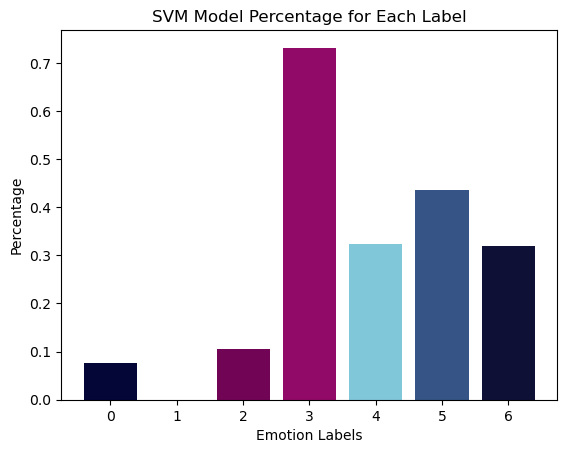

In [35]:
# Extract recall for each label
labels = list(svm_classification_report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
recall_values = [svm_classification_report[label]['recall'] for label in labels]

labels = list(map(int, labels))

bar_colors = ['#030637', '#3C0753', '#720455', '#910A67', '#7FC7D9', '#365486', '#0F1035']

plt.bar(labels, recall_values, color=bar_colors)
plt.xlabel('Emotion Labels')
plt.ylabel('Percentage')
plt.title('SVM Model Percentage for Each Label')
plt.show()

Model Training and Evaluation - Naïve Bayes

In [8]:
# Train Naïve Bayes Model

nb_model = GaussianNB()
nb_model.fit(X_train_pca_std, y_train)

# Evaluate Naïve Bayes

nb_predictions = nb_model.predict(X_test_pca_std)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naïve Bayes Accuracy:", nb_accuracy)
print("Naïve Bayes Classification Report:\n", classification_report(y_test, nb_predictions))
nb_classification_report = classification_report(y_test, nb_predictions, output_dict=True)

Naïve Bayes Accuracy: 0.3392309835608805
Naïve Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.13      0.18       985
           1       0.00      0.00      0.00       102
           2       0.23      0.16      0.19      1043
           3       0.37      0.66      0.47      1765
           4       0.28      0.26      0.27      1210
           5       0.49      0.41      0.45       795
           6       0.33      0.27      0.29      1278

    accuracy                           0.34      7178
   macro avg       0.28      0.27      0.26      7178
weighted avg       0.32      0.34      0.31      7178



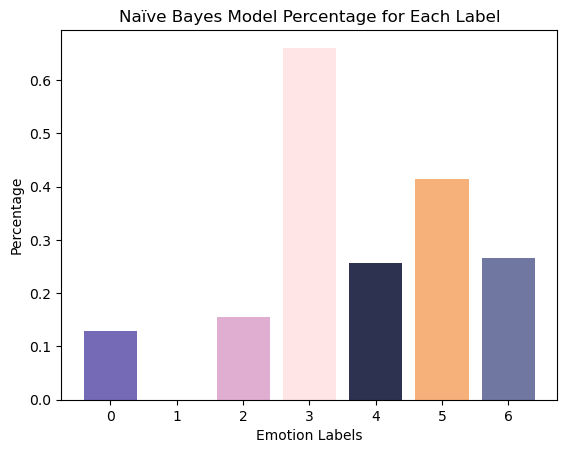

In [34]:
# Extract recall for each label
labels = list(nb_classification_report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
recall_values = [nb_classification_report[label]['recall'] for label in labels]

labels = list(map(int, labels))

bar_colors = ['#756AB6', '#AC87C5', '#E0AED0', '#FFE5E5', '#2D3250', '#F6B17A', '#7077A1']

plt.bar(labels, recall_values, color=bar_colors)
plt.xlabel('Emotion Labels')
plt.ylabel('Percentage')
plt.title('Naïve Bayes Model Percentage for Each Label')
plt.show()